# Naive Bayes

## Conditional Probability $P(A | B)$

Conditional probability is the probability of one event occurring given that another event has occurred. 

The conditional probability is usually denoted by $P(A | B)$ and is defined as:

$$ P(A | B) = \frac{P(A, B)}{P(B)} $$

The denominator is the marginal probability of $B$.

<img width="80%" align="center" src="../assets/conditionalprob.png">

<br/>

For example, if we are flipping two coins, the conditional probability of flipping heads in the second toss, knowing the first toss was tails is: 

| Possible world | $\text{Coin}_1$ | $\text{Coin}_2$ | $P(\omega)$ |
|:----------------:|:-------------:|:-------------:|:-------------:|
| $\omega_1$ | H | H | 0.25 |
| $\omega_2$ | H | T | 0.25 |
| $\omega_3$ | T | H | 0.25 |
| $\omega_4$ | T | T | 0.25 |

$$ P(\text{Coin}_2 = H | \text{Coin}_1 = T) = \frac{P(\text{Coin}_2 = H, \text{Coin}_1 = T)}{P(\text{Coin}_1 = T)} = \frac{0.25}{0.5} = 0.5 $$

In [ ]:
merged

,C,D,"P(C, D)",P(C),P(D),P(C) P(D)
0,H,1,0.24,0.51,0.43,0.2193
1,T,1,0.19,0.49,0.43,0.2107
2,H,2,0.13,0.51,0.22,0.1122
3,T,2,0.09,0.49,0.22,0.1078
4,H,3,0.09,0.51,0.22,0.1122
5,T,3,0.13,0.49,0.22,0.1078
6,H,4,0.01,0.51,0.05,0.0255
7,T,4,0.04,0.49,0.05,0.0245
8,H,5,0.03,0.51,0.03,0.0153
9,T,5,0.00,0.49,0.03,0.0147


In [ ]:
merged['P(D | C)'] = merged['P(C, D)'] / merged['P(C)']
merged['P(D | C)']

0     0.470588
1     0.387755
2     0.254902
3     0.183673
4     0.176471
5     0.265306
6     0.019608
7     0.081633
8     0.058824
9     0.000000
10    0.019608
11    0.081633
Name: P(D | C), dtype: float64

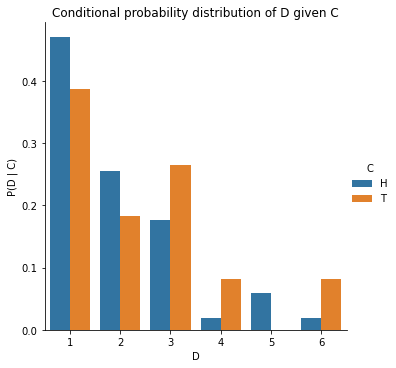

In [ ]:
merged[['C', 'D', 'P(D | C)']]

axs = sns.catplot(data=merged, x="D", y="P(D | C)", hue="C", kind="bar");
axs.set(title="Conditional probability distribution of D given C\nNote that the blue bars add up to 1");

Note that the sum of conditional probabilites, unlike joint probability, is not 1. 

In [ ]:
merged["P(D | C)"].sum()

2.0

This is because 

$$ \sum_C \sum_D P(D|C) = \sum_D P(D|C=\text{Heads}) + \sum_D P(D|C=\text{Tails}) $$

And $\sum_D P(D|C=\text{Heads})$ and $\sum_D P(D|C=\text{Tails})$ are individually probability distributions that each sum to 1, over different values of $D$. 

In other words, in the plot above, the blue bars add up to 1 and the orange bars add up to 1. 

In [ ]:
heads = merged[merged["C"] == "H"]
tails = merged[merged["C"] == "T"]

heads["P(D | C)"].sum(), tails["P(D | C)"].sum()

(1.0, 1.0)

## Product Rule $P(A, B)$

Rearranging the definition of conditional probability, we get the product rule:

$$ P(A, B) = P(A | B) \cdot P(B) $$

Similarly, we can also write:

$$ P(A, B) = P(B | A) \cdot P(A)$$

In summary, 

$$ P(A, B) = P(A | B) \cdot P(B) = P(B | A) \cdot P(A)$$

## Chain Rule $P(A, B, C)$

The chain rule is a generalization of the product rule to more than two events.

$ P(A, B, C) = P(A | B, C) \cdot P(B, C) $

$P(A, B, C) = P(A | B, C) \cdot P(B | C) \cdot P(C)$

since $P(B, C) = P(B | C) \cdot P(C)$ as per the product rule.

**Chain rule essentially allows expressing the joint probability of multiple random variables as a product of conditional probabilities.** This is useful because conditional probabilities are often easier to estimate from data than joint probabilities.


## Inclusion-Exclusion Principle $P(A \vee B)$

Inclusion-Exclusion Principle is a way of calculating the probability of two events occurring i.e. $ P(A=a ~\text{OR}~ B=b) $ denoted generally as $P(A = a \vee B = b)$.

It is defined as:

$$ P(A = a \vee B = b) = P(A = a) + P(B = b) - P(A = a \wedge B = b) $$

<img align="center" width="80%" src="../assets/inclusion_exclusion.png">

For example, if we are rolling two dice, the Inclusion-Exclusion Principle can be used to calculate the probability of rolling a 1 on the first die or a 2 on the second die.

$P(\text{Coin}_1=H \vee \text{Coin}_2=T) $

$ = P(\text{Coin}_2=H) + P(\text{Coin}_1=T) - P(\text{Coin}_2=H ∧ \text{Coin}_1=T)$

$ = 0.5 + 0.5 - 0.25 $

$ = 0.75$ 


## Bayes Theorem $P(A|B)$

Bayes theorem is a way of calculating conditional probability. For example, if we are rolling two dice, Bayes theorem can be used to calculate the probability of rolling a 1 on the first die given that we rolled a 2 on the second die.

$$ P(A | B) = \frac{P(B | A) \cdot P(A)}{P(B)} $$

$P(A|B)$ in the context of Bayes theorem is called the **Posterior** probability. 

$P(B|A)$ is called the **Likelihood**. 

$P(A)$ is called the **Prior** probability. 

$P(B)$ is called the **Evidence**, also known as _Marginal Likelihood_.

$$ P(\text{Posterior}) = \frac{P(\text{Likelihood})\cdot P(\text{Prior})}{P(\text{Evidence})}$$



<center><img width="40%" src="https://www.analyticsvidhya.com/wp-content/uploads/2016/06/12.jpg"></center>

<!-- 
## Expectation

Expectation is the average value of a random variable. For example, if we are rolling a die, the expectation is the average value of the number that we roll. The expectation is usually denoted by $E(X)$.

$$ E(X) = \sum_{x \in X} x \cdot P(X=x) $$

## Variance

Variance is a measure of how spread out a random variable is. For example, if we are rolling a die, the variance is a measure of how spread out the numbers that we roll are. The variance is usually denoted by $Var(X)$.

$$ Var(X) = E((X - E(X))^2) = E(X^2) - E(X)^2 $$

## Covariance

Covariance is a measure of how two random variables vary together. For example, if we are rolling two dice, the covariance is a measure of how the numbers that we roll on the two dice vary together. The covariance is usually denoted by $Cov(X, Y)$.

$$ Cov(X, Y) = E((X - E(X)) \cdot (Y - E(Y))) = E(X \cdot Y) - E(X) \cdot E(Y) $$

## Correlation

Correlation is a measure of how two random variables vary together. For example, if we are rolling two dice, the correlation is a measure of how the numbers that we roll on the two dice vary together. The correlation is usually denoted by $Corr(X, Y)$.

$$ Corr(X, Y) = \frac{Cov(X, Y)}{\sqrt{Var(X) \cdot Var(Y)}} $$ -->

Bayes Theorem allows a formal method of updating prior beliefs with new evidence and is the foundation of Bayesian Statistics. We will talk more about this when we talk about Statistics. 

In machine learning, the task is often to find $P(Y | X_1 = x_1, X_2 = x_2, \ldots X_D = x_D)$ i.e. the probability of an unknown Y, given some values for $D$ features ($X_1, X_2 \ldots X_D$). Bayes theorem allows us to calculate this probability from the data. 

Let's assume we are interested in predicting if a person is a football player ($Y_F=1$) or not ($Y_F=0$), given their height ($X_H$) and weight ($X_W$).

Say, we observe a person who is 7 feet tall and weighs 200 pounds. We can use Bayes theorem to calculate the probability of this person being a football player using the following equation:

$P(Y | X_H = 7, X_W = 200) = \frac{P(X_H = 7, X_W = 200 | Y_F) \cdot P(Y_F)}{P(X_H = 7, X_W = 200)}$

Note that here $P(X_H = 7, X_W = 200 | Y_F)$ is the **Likelihood** probability of observing someone who is 7 feet tall and weighs 200 pounds, knowing if they are a football player. 

$P(Y_F)$ is the **Prior** probability of a person being a football player out of the entire population. 

$P(X_H = 7, X_W = 200)$ is the probability of the **Evidence** i.e. probability  of observing _anyone_ who is 7 feet tall and weighs 200 pounds in the entire population.